<a href="https://colab.research.google.com/github/sanishrai/UdacityDeeplearingGithub/blob/master/DeepLearnMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [3]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [10]:
torch.manual_seed(7)
features = torch.randn((1,5))
weights = torch.rand_like(features)
bias=torch.rand(1,1)

In [11]:
input = torch.sum(features * weights)+bias # sum the product and add bias
output = activation(input) # send it to sigmoid activation function for output
# print(output)
# print(weights)

tensor([[0.8072]])
tensor([[0.2868, 0.2063, 0.4451, 0.3593, 0.7204]])


In [12]:
weights = weights.view(5,1)#changing the shape of weights same as features for matrix multiplication
input = torch.sum(torch.mm(features, weights))+bias # sum the product and add bias
output = activation(input) # send it to sigmoid activation function for output
# print(output)

tensor([[0.2868],
        [0.2063],
        [0.4451],
        [0.3593],
        [0.7204]])
tensor([[0.8072]])


# **Second example**

In [13]:
torch.manual_seed(7)
features = torch.randn((1,3))
#hidden layer
n_input = features.shape[1]
n_hidden=2
n_output=1

#weights
w1 = torch.randn(n_input,n_hidden)
w2 = torch.randn(n_hidden,n_output)

#bias
b1=torch.randn(1,n_hidden)
b2=torch.randn(1,n_output)



In [23]:
#print(features)
#print(w1)
h_vector = torch.mm(features,w1)+b1
#print(h_vector)
h_activated = activation(h_vector)
y = activation(torch.mm(h_activated,w2)+b2)
print(y)

tensor([[0.3171]])


# MNIST Example

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import helper
import matplotlib.pyplot as plt

In [8]:
from torchvision import datasets, transforms
#a transform to normalize data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
                                ])
#Download the data
train = datasets.MNIST('MNIST_data/',download=True,train=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64,shuffle=True)

In [5]:
torch.manual_seed(7)

#hidden layer
n_input = 784
n_hidden=256
n_output=10

#weights
w1 = torch.randn(n_input,n_hidden)
w2 = torch.randn(n_hidden,n_output)

#bias
b1=torch.randn(1,n_hidden)
b2=torch.randn(1,n_output)



In [22]:
#flatten images
#print(train_loader.shape)
# for image,label in enumerate(train_loader):
#   print(images.shape)
dataiter = iter (train_loader)
images, labels = dataiter.next()
print(images.shape)
images = images.view(-1,784)
print(images.shape)
#train1 = train[0].view(-1,784)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


In [14]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [29]:
def softmax(x):
  num = torch.exp(x)
  den = torch.sum(torch.exp(x),1).view(-1,1)
  return num/den

In [ ]:
h_vector = torch.mm(images,w1)+b1
h_activated = activation(h_vector)
y = softmax(torch.mm(h_activated,w2)+b2)
print(y.shape)
print(y)
print(y.sum(dim=1))

In [53]:
from torch import nn
import torch.nn.functional as F
from torch import optim

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784,128)
    self.hidden2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)

  def forward (self,x):
    x=F.relu(self.hidden1(x))
    x=F.relu(self.hidden2(x))
    x=F.log_softmax(self.output(x),dim=1)

    return x




In [72]:
from tqdm import tqdm
model = Network()
print(model)
#define loss
criterion = nn.NLLLoss()
#get optimizer
optimizer = optim.SGD(model.parameters(),lr=0.01)
epochs = 5
for e in tqdm(range(epochs)):
  running_loss=0
  for images, labels in train_loader:
    #flatten images
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad() #clear gradient
    #forward pass in the model
    y = model(images)
    loss = criterion(y, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()

  else:
    print(f"Training loss:{running_loss/len(train_loader)}")



  0%|          | 0/5 [00:00<?, ?it/s]

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


 20%|██        | 1/5 [00:09<00:36,  9.21s/it]

Training loss:1.0673412506196545


 40%|████      | 2/5 [00:18<00:27,  9.23s/it]

Training loss:0.3886360198195809


 60%|██████    | 3/5 [00:27<00:18,  9.18s/it]

Training loss:0.3262403793871276


 80%|████████  | 4/5 [00:36<00:09,  9.19s/it]

Training loss:0.2944573290280696


100%|██████████| 5/5 [00:45<00:00,  9.16s/it]

Training loss:0.2707267450228302


In [75]:
def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

tensor([5.1776e-06, 8.8238e-06, 1.4613e-04, 4.3556e-05, 9.9291e-01, 2.1959e-03,
        1.0573e-03, 1.1020e-04, 7.1346e-04, 2.8108e-03])


<BarContainer object of 10 artists>

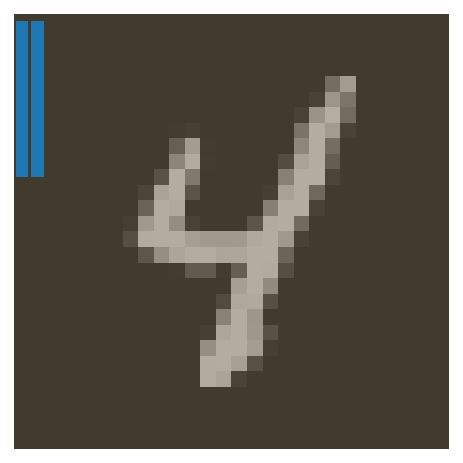

In [107]:
%matplotlib inline
import helper
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))
img = images[0].view(1,784)
with torch.no_grad():
  logits = model(img)

ps = F.softmax(logits,dim=1)
print(ps[0])
imshow(img.view(1,28,28))
torch.Tensor.ndim = property(lambda self: len(self.shape))  # Fix it

plt.bar(ps[0],10)